In [17]:
# Import the necessary libraries for data manipulation and visualization.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [18]:


# Load the CSV file into a DataFrame.
# This reads the IP data collected from the OSINT platform for analysis.
df = pd.read_csv('/content/osint_data.csv')


# New Section

In [19]:
# Display the first few rows of the dataset to understand its structure.
#print(df.head())


display(df.head())

,IP,Risk Level,Country,Abuse Score
0,103.112.234.65,Low Risk,IN,Abuse Score: 0
1,180.21.123.160,High Risk,JP,Abuse Score: 100
2,47.108.74.203,High Risk,CN,Abuse Score: 100
3,20.64.104.65,High Risk,US,Abuse Score: 100
4,47.238.193.69,High Risk,HK,Abuse Score: 89


In [20]:
# Get information about the dataset: number of entries, column types, and null values.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   IP           500 non-null    object
 1   Risk Level   500 non-null    object
 2   Country      500 non-null    object
 3   Abuse Score  500 non-null    object
dtypes: object(4)
memory usage: 15.8+ KB
None


In [21]:
# Remove 'Abuse Score: ' text and convert to numeric
df['Abuse Score'] = df['Abuse Score'].str.replace('Abuse Score: ', '').astype(int)


In [22]:
# Remove any rows with missing values (if any were introduced during conversion).
df['Risk Level'] = df['Risk Level'].str.strip()
df

,IP,Risk Level,Country,Abuse Score
0,103.112.234.65,Low Risk,IN,0
1,180.21.123.160,High Risk,JP,100
2,47.108.74.203,High Risk,CN,100
3,20.64.104.65,High Risk,US,100
4,47.238.193.69,High Risk,HK,89
...,...,...,...,...
495,73.174.195.57,Low Risk,US,0
496,117.199.48.104,Low Risk,IN,24
497,117.215.138.255,Low Risk,IN,24
498,95.141.17.35,Low Risk,GB,0


In [23]:
print(df.columns.tolist())


['IP', 'Risk Level', 'Country', 'Abuse Score']


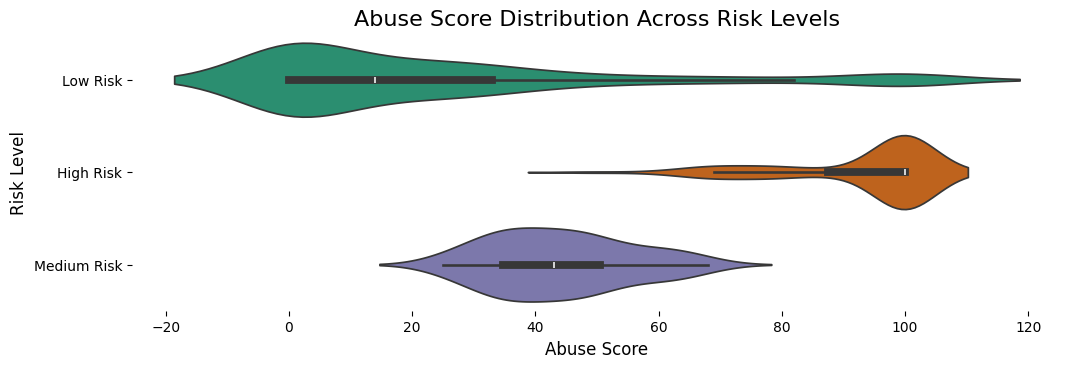

In [37]:
# Violin Plot of Abuse Score Distribution Across Risk Levels



# Set dynamic figure size based on the number of Risk Levels
figsize = (12, 1.2 * len(df['Risk Level'].unique()))
plt.figure(figsize=figsize)

# Create violin plot with Risk Level as hue for color differentiation
sns.violinplot(data=df, x='Abuse Score', y='Risk Level', hue='Risk Level', inner='box', palette='Dark2')

# Remove legend since hue and y-axis are the same
plt.legend([], [], frameon=False)

# Clean plot borders for a minimal look
sns.despine(top=True, right=True, bottom=True, left=True)

# Add plot title and axis labels
plt.title('Abuse Score Distribution Across Risk Levels', fontsize=16)
plt.xlabel('Abuse Score', fontsize=12)
plt.ylabel('Risk Level', fontsize=12)

plt.savefig('Violin Plot of Abuse Score Distribution Across Risk Levels', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


<ipython-input-25-164b04a18712>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Abuse Score', y='Risk Level', inner='box', palette='Dark2')


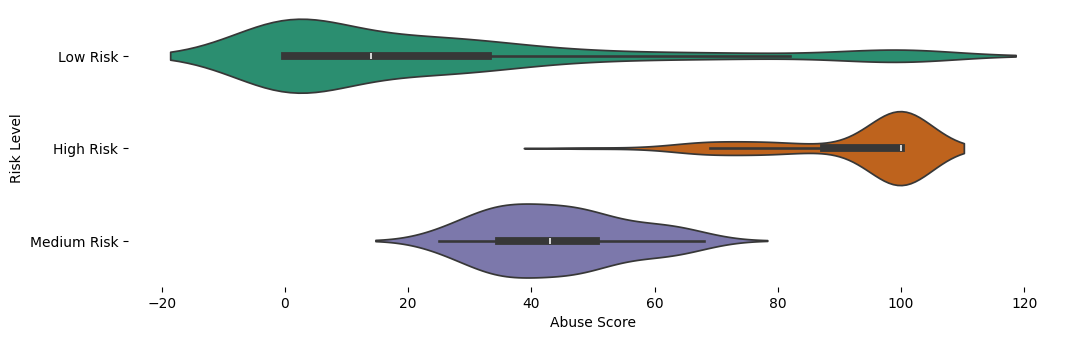

In [25]:
# @title Risk Level vs Abuse Score

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Risk Level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Abuse Score', y='Risk Level', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

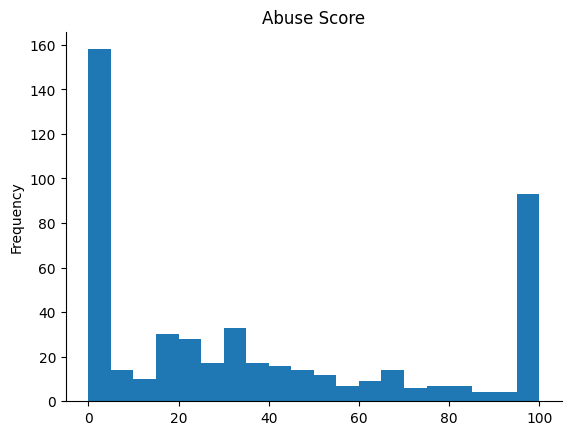

In [26]:
# @title Abuse Score

from matplotlib import pyplot as plt
df['Abuse Score'].plot(kind='hist', bins=20, title='Abuse Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

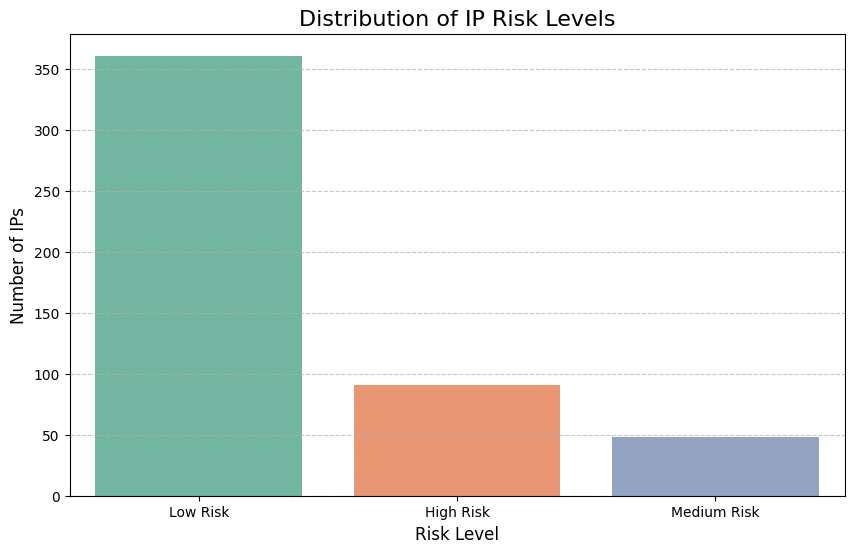

In [27]:
# Visualize the distribution of risk levels across all IPs
plt.figure(figsize=(10, 6))

# Create the countplot with hue to avoid deprecation warning
sns.countplot(x='Risk Level', data=df, hue='Risk Level', order=df['Risk Level'].value_counts().index, palette='Set2')

# Remove redundant legend since hue and x-axis are the same
plt.legend([], [], frameon=False)

# Add title and axis labels with font styling
plt.title('Distribution of IP Risk Levels', fontsize=16)
plt.xlabel('Risk Level', fontsize=12)
plt.ylabel('Number of IPs', fontsize=12)

# Adjust tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines for better visual separation
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('Distribution of risk levels across all IPs', dpi=300, bbox_inches='tight')

# Show the styled countplot
plt.show()


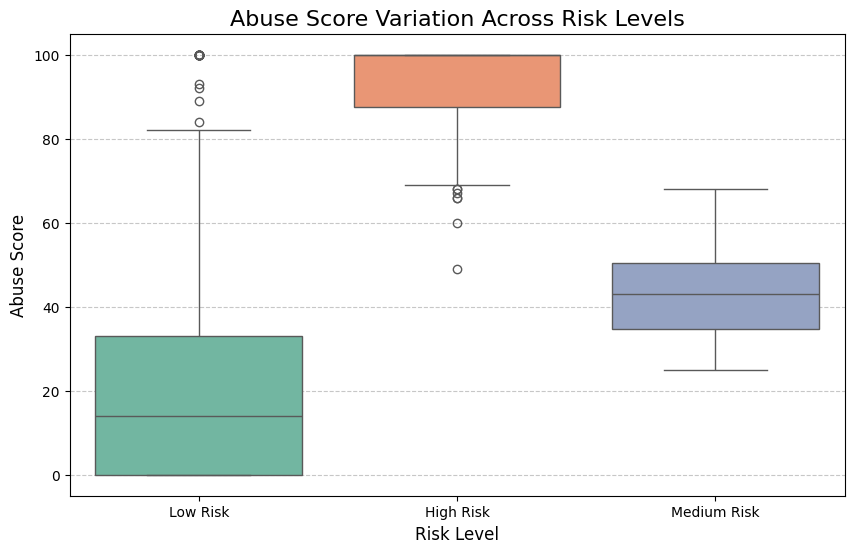

In [28]:
# Compare Abuse Scores across different Risk Levels
# Set figure size
plt.figure(figsize=(10, 6))

# Boxplot with hue assigned to Risk Level for color, avoiding deprecation warning
sns.boxplot(x='Risk Level', y='Abuse Score', data=df, hue='Risk Level', palette='Set2')

# Remove redundant legend since hue is same as x
plt.legend([],[], frameon=False)

# Add title and axis labels
plt.title('Abuse Score Variation Across Risk Levels', fontsize=16)
plt.xlabel('Risk Level', fontsize=12)
plt.ylabel('Abuse Score', fontsize=12)

# Adjust tick label sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig(' Compare Abuse Scores across different Risk Levels', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


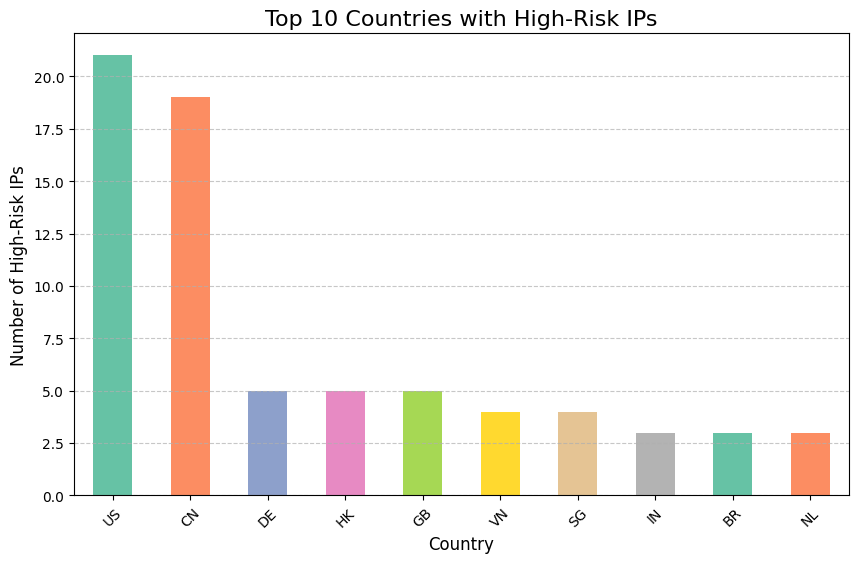

In [36]:
# Filter for high-risk IPs and get the top 10 countries
top_high_risk_countries = df[df['Risk Level'] == 'High Risk']['Country'].value_counts().head(10)

# Set figure size (width, height in inches)
plt.figure(figsize=(10, 6))

# Choose a color palette
colors = sns.color_palette('Set2', len(top_high_risk_countries))

# Create the bar plot with custom colors
top_high_risk_countries.plot(kind='bar', color=colors)

# Add title and labels with font adjustments
plt.title('Top 10 Countries with High-Risk IPs', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of High-Risk IPs', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Optional: Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
plt.savefig('top_10_countries_high_risk_ips.png', dpi=300, bbox_inches='tight')

# Show the enhanced plot
plt.show()


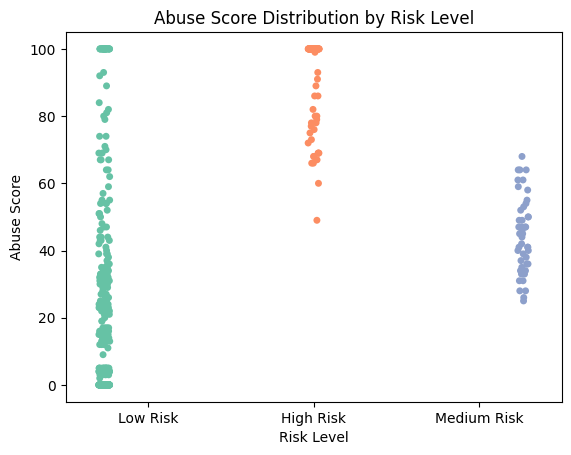

In [33]:
# Abuse Score Distribution  by High Risk Level
sns.stripplot(x='Risk Level', y='Abuse Score', data=df, jitter=True, hue='Risk Level', palette='Set2', dodge=True)

# Remove duplicate legend (because hue is same as x)
plt.legend([],[], frameon=False)

# Add titles and labels
plt.title('Abuse Score Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Abuse Score')

plt.savefig('Abuse Score Distribution  by High Risk Level', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


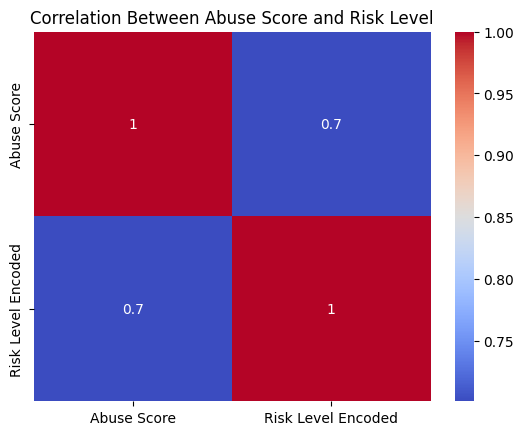

In [34]:
# Example: Encoding Risk Level to numerical values for correlation
df_encoded = df.copy()
risk_map = {'Low Risk': 1, 'Medium Risk': 2, 'High Risk': 3}
df_encoded['Risk Level Encoded'] = df_encoded['Risk Level'].map(risk_map)

# Correlation heatmap
sns.heatmap(df_encoded[['Abuse Score', 'Risk Level Encoded']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Abuse Score and Risk Level')
plt.show()
